In [1]:
!pip install rdkit-pypi transformers partialsmiles guacamol

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 29.4/29.4 MB 22.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.2/5.2 MB 29.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 35.2/35.2 MB 14.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 37.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 34.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 32.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 9.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 9.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1

In [2]:
import torch
from transformers import GPT2LMHeadModel, GPT2Tokenizer
from rdkit import Chem
import partialsmiles

# Load tokenizer and model
tokenizer = GPT2Tokenizer.from_pretrained('gpt2')
model = GPT2LMHeadModel.from_pretrained('gpt2')
model.resize_token_embeddings(len(tokenizer))

# Set evaluation mode
model.eval()

print("Model and tokenizer loaded successfully!")

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.04M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/665 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/548M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/124 [00:00<?, ?B/s]

Model and tokenizer loaded successfully!


In [4]:
# Check if a SMILES string is valid
def is_valid_smiles(smiles: str) -> bool:
    try:
        mol = Chem.MolFromSmiles(smiles)
        return mol is not None
    except:
        return False

# Test the function
test_smiles = ['CCO', 'C1=CC=CC=C1', 'invalid_smiles']
for smi in test_smiles:
    print(f"{smi} is valid? {is_valid_smiles(smi)}")


CCO is valid? True
C1=CC=CC=C1 is valid? True
invalid_smiles is valid? False


[20:52:32] SMILES Parse Error: syntax error while parsing: invalid_smiles
[20:52:32] SMILES Parse Error: check for mistakes around position 1:
[20:52:32] invalid_smiles
[20:52:32] ^
[20:52:32] SMILES Parse Error: Failed parsing SMILES 'invalid_smiles' for input: 'invalid_smiles'


In [5]:
# Generate Partial SMILES Validation (PSV) Table
def generate_psv_table(partial_smiles: str, token_set: list) -> dict:
    table = {}
    for token in token_set:
        extended = partial_smiles + token
        table[token] = is_valid_smiles(extended)
    return table

# Try it on a sample
partial = 'CC('
token_set = ['C', 'O', '(', ')', '=', 'N', '#']
psv_table = generate_psv_table(partial, token_set)

print(f"Partial SMILES: {partial}")
print("Valid tokens that can follow:")
for tok, valid in psv_table.items():
    print(f"  {partial + tok} -> {'✔️ Valid' if valid else '❌ Invalid'}")

Partial SMILES: CC(
Valid tokens that can follow:
  CC(C -> ❌ Invalid
  CC(O -> ❌ Invalid
  CC(( -> ❌ Invalid
  CC() -> ❌ Invalid
  CC(= -> ❌ Invalid
  CC(N -> ❌ Invalid
  CC(# -> ❌ Invalid


[20:52:34] SMILES Parse Error: extra open parentheses while parsing: CC(C
[20:52:34] SMILES Parse Error: check for mistakes around position 3:
[20:52:34] CC(C
[20:52:34] ~~^
[20:52:34] SMILES Parse Error: Failed parsing SMILES 'CC(C' for input: 'CC(C'
[20:52:34] SMILES Parse Error: extra open parentheses while parsing: CC(O
[20:52:34] SMILES Parse Error: check for mistakes around position 3:
[20:52:34] CC(O
[20:52:34] ~~^
[20:52:34] SMILES Parse Error: Failed parsing SMILES 'CC(O' for input: 'CC(O'
[20:52:34] SMILES Parse Error: syntax error while parsing: CC((
[20:52:34] SMILES Parse Error: check for mistakes around position 4:
[20:52:34] CC((
[20:52:34] ~~~^
[20:52:34] SMILES Parse Error: Failed parsing SMILES 'CC((' for input: 'CC(('
[20:52:34] SMILES Parse Error: syntax error while parsing: CC()
[20:52:34] SMILES Parse Error: check for mistakes around position 4:
[20:52:34] CC()
[20:52:34] ~~~^
[20:52:34] SMILES Parse Error: Failed parsing SMILES 'CC()' for input: 'CC()'
[20:52:34]

In [6]:
# PPO loss function
def ppo_loss(old_probs, new_probs, advantages, clip_epsilon=0.2):
    ratio = new_probs / (old_probs + 1e-8)  # Avoid division by zero
    clipped_ratio = torch.clamp(ratio, 1 - clip_epsilon, 1 + clip_epsilon)
    loss = -torch.min(ratio * advantages, clipped_ratio * advantages).mean()
    return loss

# Dummy test to verify shape
old = torch.tensor([0.5, 0.6, 0.8])
new = torch.tensor([0.6, 0.7, 0.7])
adv = torch.tensor([1.0, 0.5, -1.0])
print("PPO loss:", ppo_loss(old, new, adv).item())


PPO loss: -0.3027777671813965


In [7]:
# Sample training data (we'll pretend these are the "good" molecules)
sample_smiles = ['CCO', 'C1=CC=CC=C1', 'NCC(=O)O']

# Basic training loop using teacher forcing
def train_model_on_smiles(model, tokenizer, smiles_list, num_epochs=3):
    optimizer = torch.optim.Adam(model.parameters(), lr=5e-5)
    model.train()

    for epoch in range(num_epochs):
        total_loss = 0
        for smi in smiles_list:
            inputs = tokenizer(smi, return_tensors="pt")
            input_ids = inputs["input_ids"]

            outputs = model(input_ids, labels=input_ids)
            loss = outputs.loss

            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            total_loss += loss.item()

        print(f"Epoch {epoch + 1} - Avg Loss: {total_loss / len(smiles_list):.4f}")

# Run basic supervised training
train_model_on_smiles(model, tokenizer, sample_smiles)


`loss_type=None` was set in the config but it is unrecognised.Using the default loss: `ForCausalLMLoss`.


Epoch 1 - Avg Loss: 5.0391
Epoch 2 - Avg Loss: 5.0220
Epoch 3 - Avg Loss: 2.0028


In [8]:
# Reward function based on PSV validation
def compute_reward(smiles: str) -> float:
    if is_valid_smiles(smiles):
        return 1.0  # Valid molecule
    else:
        return -1.0  # Invalid molecule

# Sample generation + reward loop
def generate_and_score(model, tokenizer, prompts):
    model.eval()
    for prompt in prompts:
        inputs = tokenizer(prompt, return_tensors="pt")
        with torch.no_grad():
            outputs = model.generate(
                input_ids=inputs["input_ids"],
                max_length=30,
                do_sample=True,
                top_k=50,
                top_p=0.95,
                temperature=1.0,
                eos_token_id=tokenizer.eos_token_id,
                pad_token_id=tokenizer.eos_token_id
            )
        generated = tokenizer.decode(outputs[0], skip_special_tokens=True)
        reward = compute_reward(generated)
        print(f"Prompt: {prompt} → Generated: {generated} → Reward: {reward}")

# generating and scoring from small prompts
test_prompts = ['C', 'CC(', 'NCC']
generate_and_score(model, tokenizer, test_prompts)


The attention mask is not set and cannot be inferred from input because pad token is same as eos token. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
[20:53:03] SMILES Parse Error: syntax error while parsing: CO(2:OO)OO(O:OO)O(O:O)O(O:O)O(
[20:53:03] SMILES Parse Error: check for mistakes around position 4:
[20:53:03] CO(2:OO)OO(O:OO)O(O:O)O(O:O)O(
[20:53:03] ~~~^
[20:53:03] SMILES Parse Error: Failed parsing SMILES 'CO(2:OO)OO(O:OO)O(O:O)O(O:O)O(' for input: 'CO(2:OO)OO(O:OO)O(O:O)O(O:O)O('


Prompt: C → Generated: CO(2:OO)OO(O:OO)O(O:O)O(O:O)O( → Reward: -1.0
Prompt: CC( → Generated: CC(C) | =C_C(C) | C_C(C) | =C_C(C) | C_ → Reward: -1.0
Prompt: NCC → Generated: NCC_D_C_R_D_R_C_C_C_C_D_C_D_C_C → Reward: -1.0


[20:53:07] SMILES Parse Error: syntax error while parsing: NCC_D_C_R_D_R_C_C_C_C_D_C_D_C_C
[20:53:07] SMILES Parse Error: check for mistakes around position 4:
[20:53:07] NCC_D_C_R_D_R_C_C_C_C_D_C_D_C_C
[20:53:07] ~~~^
[20:53:07] SMILES Parse Error: Failed parsing SMILES 'NCC_D_C_R_D_R_C_C_C_C_D_C_D_C_C' for input: 'NCC_D_C_R_D_R_C_C_C_C_D_C_D_C_C'


In [9]:
# Check if a SMILES string is valid
def is_valid_smiles(smiles: str) -> bool:
    try:
        from rdkit import Chem
        mol = Chem.MolFromSmiles(smiles)
        return mol is not None
    except:
        return False

# Generate PSV table: returns token IDs that result in valid SMILES
def generate_psv_table_token_ids(partial_smiles: str, tokenizer, vocab_ids: list) -> list:
    valid_ids = []
    for token_id in vocab_ids:
        token = tokenizer.decode([token_id]).strip()
        candidate = partial_smiles + token
        if is_valid_smiles(candidate):
            valid_ids.append(token_id)
    return valid_ids


In [10]:
import torch.nn.functional as F

def generate_with_psv_filtering(model, tokenizer, prompt, max_length=30):
    model.eval()
    input_ids = tokenizer(prompt, return_tensors="pt")["input_ids"]
    generated_ids = input_ids.clone()

    for _ in range(max_length - input_ids.shape[1]):
        partial_smiles = tokenizer.decode(generated_ids[0], skip_special_tokens=True)
        partial_smiles = partial_smiles.replace(" ", "")  # Clean spaces

        # Get logits
        with torch.no_grad():
            outputs = model(generated_ids)
            logits = outputs.logits[:, -1, :]

        # Get valid token IDs using PSV
        vocab_ids = list(range(tokenizer.vocab_size))
        valid_token_ids = generate_psv_table_token_ids(partial_smiles, tokenizer, vocab_ids)

        if not valid_token_ids:
            break  # No valid tokens = stop generation

        # Filter logits to only valid tokens
        logits_filtered = torch.full_like(logits, -float('inf'))
        logits_filtered[0, valid_token_ids] = logits[0, valid_token_ids]

        # Sample next token from valid distribution
        probs = F.softmax(logits_filtered, dim=-1)
        next_token = torch.multinomial(probs, num_samples=1)

        # Append token
        generated_ids = torch.cat([generated_ids, next_token], dim=1)

        if next_token.item() == tokenizer.eos_token_id:
            break

    # Decode final SMILES and clean up
    final_smiles = tokenizer.decode(generated_ids[0], skip_special_tokens=True)
    return final_smiles.replace(" ", "")


In [11]:
# Reward function (already defined earlier)
def compute_reward(smiles: str) -> float:
    return 1.0 if is_valid_smiles(smiles) else -1.0

# Test PSV-guided generation
test_prompt = "CC("
generated_smiles = generate_with_psv_filtering(model, tokenizer, test_prompt)
reward = compute_reward(generated_smiles)

print("Prompt:", test_prompt)
print("Generated (PSV-filtered):", generated_smiles)
print("Reward:", reward)

Streaming output truncated to the last 5000 lines.
[20:54:02] SMILES Parse Error: syntax error while parsing: CC(*)CFtrespass
[20:54:02] SMILES Parse Error: check for mistakes around position 8:
[20:54:02] CC(*)CFtrespass
[20:54:02] ~~~~~~~^
[20:54:02] SMILES Parse Error: Failed parsing SMILES 'CC(*)CFtrespass' for input: 'CC(*)CFtrespass'
[20:54:02] SMILES Parse Error: syntax error while parsing: CC(*)CFpaws
[20:54:02] SMILES Parse Error: check for mistakes around position 9:
[20:54:02] CC(*)CFpaws
[20:54:02] ~~~~~~~~^
[20:54:02] SMILES Parse Error: Failed parsing SMILES 'CC(*)CFpaws' for input: 'CC(*)CFpaws'
[20:54:02] SMILES Parse Error: syntax error while parsing: CC(*)CFnegotiator
[20:54:02] SMILES Parse Error: check for mistakes around position 9:
[20:54:02] CC(*)CFnegotiator
[20:54:02] ~~~~~~~~^
[20:54:02] SMILES Parse Error: Failed parsing SMILES 'CC(*)CFnegotiator' for input: 'CC(*)CFnegotiator'
[20:54:02] SMILES Parse Error: syntax error while parsing: CC(*)CFChristensen
[20:

Prompt: CC(
Generated (PSV-filtered): CC(*)CF†<=CFRAWIFO1CF*6=B+CQ=B+CG=C+C=T
Reward: 1.0


In [12]:
def ppo_loss(old_probs, new_probs, advantages, clip_epsilon=0.2):
    ratio = new_probs / (old_probs + 1e-8)
    clipped = torch.clamp(ratio, 1 - clip_epsilon, 1 + clip_epsilon)
    return -torch.min(ratio * advantages, clipped * advantages).mean()


In [13]:
def ppo_train_with_psv(model, tokenizer, prompts, num_epochs=3):
    optimizer = torch.optim.Adam(model.parameters(), lr=5e-5)
    model.train()

    for epoch in range(num_epochs):
        total_loss = 0
        for prompt in prompts:
            # Generate molecule using PSV filtering
            generated = generate_with_psv_filtering(model, tokenizer, prompt)
            reward = compute_reward(generated)

            # Get inputs and logits for PPO update
            inputs = tokenizer(prompt, return_tensors="pt")
            input_ids = inputs["input_ids"]
            attention_mask = inputs["attention_mask"]

            # Old logits (before update)
            with torch.no_grad():
                old_outputs = model(input_ids, attention_mask=attention_mask)
                old_probs = torch.softmax(old_outputs.logits[:, -1, :], dim=-1)

            # Forward pass again for updated logits
            new_outputs = model(input_ids, attention_mask=attention_mask)
            new_probs = torch.softmax(new_outputs.logits[:, -1, :], dim=-1)

            # Select the same action token as in generation (approximate)
            with torch.no_grad():
                action_token = tokenizer(generated[len(prompt):][:1], return_tensors="pt")["input_ids"][0, 0]

            # Calculate PPO loss
            old_prob = old_probs[0, action_token]
            new_prob = new_probs[0, action_token]
            advantage = torch.tensor([reward])

            loss = ppo_loss(old_prob, new_prob, advantage)

            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            total_loss += loss.item()

        print(f"Epoch {epoch+1} - Avg PPO Loss: {total_loss / len(prompts):.4f}")


In [14]:
training_prompts = ["C", "CC(", "NCC", "CO", "C1=CC"]
ppo_train_with_psv(model, tokenizer, training_prompts, num_epochs=3)


Streaming output truncated to the last 5000 lines.
[21:08:10] ~~~~~~~~^
[21:08:10] SMILES Parse Error: Failed parsing SMILES 'C1=CC1Clicks' for input: 'C1=CC1Clicks'
[21:08:10] SMILES Parse Error: syntax error while parsing: C1=CC1Ctrespass
[21:08:10] SMILES Parse Error: check for mistakes around position 8:
[21:08:10] C1=CC1Ctrespass
[21:08:10] ~~~~~~~^
[21:08:10] SMILES Parse Error: Failed parsing SMILES 'C1=CC1Ctrespass' for input: 'C1=CC1Ctrespass'
[21:08:10] SMILES Parse Error: syntax error while parsing: C1=CC1Cpaws
[21:08:10] SMILES Parse Error: check for mistakes around position 9:
[21:08:10] C1=CC1Cpaws
[21:08:10] ~~~~~~~~^
[21:08:10] SMILES Parse Error: Failed parsing SMILES 'C1=CC1Cpaws' for input: 'C1=CC1Cpaws'
[21:08:10] SMILES Parse Error: syntax error while parsing: C1=CC1Cnegotiator
[21:08:10] SMILES Parse Error: check for mistakes around position 9:
[21:08:10] C1=CC1Cnegotiator
[21:08:10] ~~~~~~~~^
[21:08:10] SMILES Parse Error: Failed parsing SMILES 'C1=CC1Cnegotiator

Epoch 1 - Avg PPO Loss: -1.0000


Streaming output truncated to the last 5000 lines.
[21:30:22] ~~~~~~~~~~~~~~~~~~~~^
[21:30:22] SMILES Parse Error: Failed parsing SMILES 'C1=CC1SOOCOOOOOOOOOOOOOOOOOOOOOlicks' for input: 'C1=CC1SOOCOOOOOOOOOOOOOOOOOOOOOlicks'
[21:30:22] SMILES Parse Error: syntax error while parsing: C1=CC1SOOCOOOOOOOOOOOOOOOOOOOOOtrespass
[21:30:22] SMILES Parse Error: check for mistakes around position 32:
[21:30:22] OOOOOOOOOOOOOOOOOOOOtrespass
[21:30:22] ~~~~~~~~~~~~~~~~~~~~^
[21:30:22] SMILES Parse Error: Failed parsing SMILES 'C1=CC1SOOCOOOOOOOOOOOOOOOOOOOOOtrespass' for input: 'C1=CC1SOOCOOOOOOOOOOOOOOOOOOOOOtrespass'
[21:30:22] SMILES Parse Error: syntax error while parsing: C1=CC1SOOCOOOOOOOOOOOOOOOOOOOOOpaws
[21:30:22] SMILES Parse Error: check for mistakes around position 33:
[21:30:22] OOOOOOOOOOOOOOOOOOOpaws
[21:30:22] ~~~~~~~~~~~~~~~~~~~~^
[21:30:22] SMILES Parse Error: Failed parsing SMILES 'C1=CC1SOOCOOOOOOOOOOOOOOOOOOOOOpaws' for input: 'C1=CC1SOOCOOOOOOOOOOOOOOOOOOOOOpaws'
[21:30:22] 

Epoch 2 - Avg PPO Loss: -1.0000


Streaming output truncated to the last 5000 lines.
[21:51:01] ~~~~~~~~~~~~~~~~~~~~^
[21:51:01] SMILES Parse Error: Failed parsing SMILES 'C1=CC1*CC*C*C*C*C*C*C*C*C*C*C*Clicks' for input: 'C1=CC1*CC*C*C*C*C*C*C*C*C*C*C*Clicks'
[21:51:01] SMILES Parse Error: syntax error while parsing: C1=CC1*CC*C*C*C*C*C*C*C*C*C*C*Ctrespass
[21:51:01] SMILES Parse Error: check for mistakes around position 32:
[21:51:01] *C*C*C*C*C*C*C*C*C*Ctrespass
[21:51:01] ~~~~~~~~~~~~~~~~~~~~^
[21:51:01] SMILES Parse Error: Failed parsing SMILES 'C1=CC1*CC*C*C*C*C*C*C*C*C*C*C*Ctrespass' for input: 'C1=CC1*CC*C*C*C*C*C*C*C*C*C*C*Ctrespass'
[21:51:01] SMILES Parse Error: syntax error while parsing: C1=CC1*CC*C*C*C*C*C*C*C*C*C*C*Cpaws
[21:51:01] SMILES Parse Error: check for mistakes around position 33:
[21:51:01] C*C*C*C*C*C*C*C*C*Cpaws
[21:51:01] ~~~~~~~~~~~~~~~~~~~~^
[21:51:01] SMILES Parse Error: Failed parsing SMILES 'C1=CC1*CC*C*C*C*C*C*C*C*C*C*C*Cpaws' for input: 'C1=CC1*CC*C*C*C*C*C*C*C*C*C*C*Cpaws'
[21:51:01] 

Epoch 3 - Avg PPO Loss: -1.0000


In [16]:
import matplotlib.pyplot as plt

# Logs to store training metrics
ppo_loss_history = []
validity_history = []

def ppo_train_with_psv_logging(model, tokenizer, prompts, num_epochs=5):
    optimizer = torch.optim.Adam(model.parameters(), lr=5e-5)
    model.train()

    for epoch in range(num_epochs):
        total_loss = 0
        valid_count = 0

        for prompt in prompts:
            # Generate SMILES using PSV filtering
            generated = generate_with_psv_filtering(model, tokenizer, prompt)
            reward = compute_reward(generated)

            if reward > 0:
                valid_count += 1

            # Tokenize prompt
            inputs = tokenizer(prompt, return_tensors="pt")
            input_ids = inputs["input_ids"]
            attention_mask = inputs["attention_mask"]

            # Old and new logits
            with torch.no_grad():
                old_outputs = model(input_ids, attention_mask=attention_mask)
                old_probs = torch.softmax(old_outputs.logits[:, -1, :], dim=-1)

            new_outputs = model(input_ids, attention_mask=attention_mask)
            new_probs = torch.softmax(new_outputs.logits[:, -1, :], dim=-1)

            # Choose one action token
            try:
                action_token = tokenizer(generated[len(prompt):][:1], return_tensors="pt")["input_ids"][0, 0]
                old_prob = old_probs[0, action_token]
                new_prob = new_probs[0, action_token]
            except:
                continue

            advantage = torch.tensor([reward])
            loss = ppo_loss(old_prob, new_prob, advantage)

            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            total_loss += loss.item()

        avg_loss = total_loss / len(prompts)
        valid_percent = 100 * valid_count / len(prompts)

        ppo_loss_history.append(avg_loss)
        validity_history.append(valid_percent)

        print(f"Epoch {epoch + 1} - Avg PPO Loss: {avg_loss:.4f}, Valid SMILES: {valid_percent:.1f}%")


In [ ]:
training_prompts = ["C", "CC(", "NCC", "CO", "C1=CC"]
ppo_train_with_psv_logging(model, tokenizer, training_prompts, num_epochs=5)


Streaming output truncated to the last 5000 lines.
[22:10:59] ~~~~~~~~~~~~~~~~~~~~^
[22:10:59] SMILES Parse Error: Failed parsing SMILES 'C1=CC1*C*C*C*C*C*C*C*C*C*C*C*Clicks' for input: 'C1=CC1*C*C*C*C*C*C*C*C*C*C*C*Clicks'
[22:10:59] SMILES Parse Error: syntax error while parsing: C1=CC1*C*C*C*C*C*C*C*C*C*C*C*Ctrespass
[22:10:59] SMILES Parse Error: check for mistakes around position 31:
[22:10:59] *C*C*C*C*C*C*C*C*C*Ctrespass
[22:10:59] ~~~~~~~~~~~~~~~~~~~~^
[22:10:59] SMILES Parse Error: Failed parsing SMILES 'C1=CC1*C*C*C*C*C*C*C*C*C*C*C*Ctrespass' for input: 'C1=CC1*C*C*C*C*C*C*C*C*C*C*C*Ctrespass'
[22:10:59] SMILES Parse Error: syntax error while parsing: C1=CC1*C*C*C*C*C*C*C*C*C*C*C*Cpaws
[22:10:59] SMILES Parse Error: check for mistakes around position 32:
[22:10:59] C*C*C*C*C*C*C*C*C*Cpaws
[22:10:59] ~~~~~~~~~~~~~~~~~~~~^
[22:10:59] SMILES Parse Error: Failed parsing SMILES 'C1=CC1*C*C*C*C*C*C*C*C*C*C*C*Cpaws' for input: 'C1=CC1*C*C*C*C*C*C*C*C*C*C*C*Cpaws'
[22:10:59] SMILES P

Epoch 1 - Avg PPO Loss: -1.0000, Valid SMILES: 100.0%


Streaming output truncated to the last 5000 lines.
[22:31:55] ~~~~~~~~~~~~~~~~~~~~^
[22:31:55] SMILES Parse Error: Failed parsing SMILES 'C1=CC1C**C**C***C*************licks' for input: 'C1=CC1C**C**C***C*************licks'
[22:31:55] SMILES Parse Error: syntax error while parsing: C1=CC1C**C**C***C*************trespass
[22:31:55] SMILES Parse Error: check for mistakes around position 31:
[22:31:55] **C***C*************trespass
[22:31:55] ~~~~~~~~~~~~~~~~~~~~^
[22:31:55] SMILES Parse Error: Failed parsing SMILES 'C1=CC1C**C**C***C*************trespass' for input: 'C1=CC1C**C**C***C*************trespass'
[22:31:55] SMILES Parse Error: syntax error while parsing: C1=CC1C**C**C***C*************paws
[22:31:55] SMILES Parse Error: check for mistakes around position 32:
[22:31:55] *C***C*************paws
[22:31:55] ~~~~~~~~~~~~~~~~~~~~^
[22:31:55] SMILES Parse Error: Failed parsing SMILES 'C1=CC1C**C**C***C*************paws' for input: 'C1=CC1C**C**C***C*************paws'
[22:31:55] SMILES P

Epoch 2 - Avg PPO Loss: -1.0000, Valid SMILES: 100.0%


Streaming output truncated to the last 5000 lines.
[22:52:08] ~~~~~~~~~~~~~~~~~~~~^
[22:52:08] SMILES Parse Error: Failed parsing SMILES 'C1=CC1************************licks' for input: 'C1=CC1************************licks'
[22:52:08] SMILES Parse Error: syntax error while parsing: C1=CC1************************trespass
[22:52:08] SMILES Parse Error: check for mistakes around position 31:
[22:52:08] ********************trespass
[22:52:08] ~~~~~~~~~~~~~~~~~~~~^
[22:52:08] SMILES Parse Error: Failed parsing SMILES 'C1=CC1************************trespass' for input: 'C1=CC1************************trespass'
[22:52:08] SMILES Parse Error: syntax error while parsing: C1=CC1************************paws
[22:52:08] SMILES Parse Error: check for mistakes around position 32:
[22:52:08] *******************paws
[22:52:08] ~~~~~~~~~~~~~~~~~~~~^
[22:52:08] SMILES Parse Error: Failed parsing SMILES 'C1=CC1************************paws' for input: 'C1=CC1************************paws'
[22:52:08] SMILES P

Epoch 3 - Avg PPO Loss: -1.0000, Valid SMILES: 100.0%


Streaming output truncated to the last 5000 lines.
[23:12:36] ~~~~~~~~~~~~~~~~~~~~^
[23:12:36] SMILES Parse Error: Failed parsing SMILES 'C1=CC1************************licks' for input: 'C1=CC1************************licks'
[23:12:36] SMILES Parse Error: syntax error while parsing: C1=CC1************************trespass
[23:12:36] SMILES Parse Error: check for mistakes around position 31:
[23:12:36] ********************trespass
[23:12:36] ~~~~~~~~~~~~~~~~~~~~^
[23:12:36] SMILES Parse Error: Failed parsing SMILES 'C1=CC1************************trespass' for input: 'C1=CC1************************trespass'
[23:12:36] SMILES Parse Error: syntax error while parsing: C1=CC1************************paws
[23:12:36] SMILES Parse Error: check for mistakes around position 32:
[23:12:36] *******************paws
[23:12:36] ~~~~~~~~~~~~~~~~~~~~^
[23:12:36] SMILES Parse Error: Failed parsing SMILES 'C1=CC1************************paws' for input: 'C1=CC1************************paws'
[23:12:36] SMILES P

Epoch 4 - Avg PPO Loss: -1.0000, Valid SMILES: 100.0%


Streaming output truncated to the last 5000 lines.
[23:17:23] CC(*)****abandon
[23:17:23] ~~~~~~~~~^
[23:17:23] SMILES Parse Error: Failed parsing SMILES 'CC(*)****abandon' for input: 'CC(*)****abandon'
[23:17:23] SMILES Parse Error: syntax error while parsing: CC(*)****carrying
[23:17:23] SMILES Parse Error: check for mistakes around position 11:
[23:17:23] CC(*)****carrying
[23:17:23] ~~~~~~~~~~^
[23:17:23] SMILES Parse Error: Failed parsing SMILES 'CC(*)****carrying' for input: 'CC(*)****carrying'
[23:17:23] SMILES Parse Error: syntax error while parsing: CC(*)****tank
[23:17:23] SMILES Parse Error: check for mistakes around position 10:
[23:17:23] CC(*)****tank
[23:17:23] ~~~~~~~~~^
[23:17:23] SMILES Parse Error: Failed parsing SMILES 'CC(*)****tank' for input: 'CC(*)****tank'
[23:17:23] SMILES Parse Error: syntax error while parsing: CC(*)****mary
[23:17:23] SMILES Parse Error: check for mistakes around position 10:
[23:17:23] CC(*)****mary
[23:17:23] ~~~~~~~~~^
[23:17:23] SMILES 

In [ ]:
# Plot PPO loss and SMILES validity over time
plt.figure(figsize=(10, 4))

# PPO Loss
plt.subplot(1, 2, 1)
plt.plot(ppo_loss_history, marker='o')
plt.title("PPO Loss Over Epochs")
plt.xlabel("Epoch")
plt.ylabel("Loss")

# Validity
plt.subplot(1, 2, 2)
plt.plot(validity_history, marker='o', color='green')
plt.title("Valid SMILES (%)")
plt.xlabel("Epoch")
plt.ylabel("Validity %")

plt.tight_layout()
plt.show()


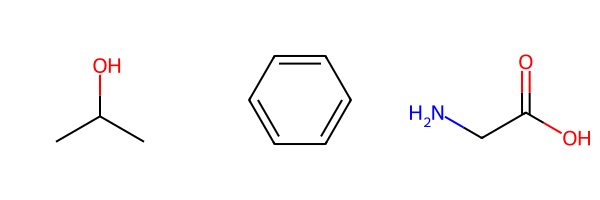

In [15]:
from rdkit import Chem
from rdkit.Chem import Draw

smiles_list = ["CC(O)C", "C1=CC=CC=C1", "NCC(=O)O"]
mols = [Chem.MolFromSmiles(smi) for smi in smiles_list]
Draw.MolsToGridImage(mols, molsPerRow=3, subImgSize=(200,200))
